<a href="https://colab.research.google.com/github/imdasrj98/Predictive-Analysis-on-Road-Accident-Risks-Based-on-Heterogeneous-Sparse-Data/blob/master/Hotspot_predictiond1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
import pandas as pd

In [ ]:
df1=pd.read_csv("pre_processed.csv")

In [ ]:

coords=df1[['Start_Lat', 'Start_Lng','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']].to_numpy()

coords=coords[0:297000]
print(coords)

[[  39.865147  -84.058723    0.       ...    0.          0.
     0.      ]
 [  40.10059   -82.925194    0.       ...    0.          0.
     0.      ]
 [  39.749916  -84.139359    0.       ...    0.          0.
     0.      ]
 ...
 [  34.06897  -117.348602    0.       ...    0.          0.
     0.      ]
 [  34.03986  -118.051704    0.       ...    0.          0.
     0.      ]
 [  34.155422 -118.2939      0.       ...    0.          0.
     0.      ]]


In [ ]:
kms_per_radian = 6371
epsilon = 36.6 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=250, algorithm='ball_tree', metric='euclidean').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))


Number of clusters: 118


Text(0.5, 1.0, 'DBSCAN')

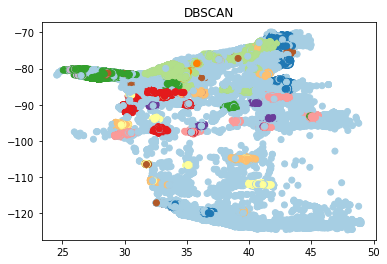

In [ ]:
import matplotlib.pyplot as plt
ypred=db.fit_predict(np.radians(coords))
plt.scatter(coords[:,0], coords[:,1],c=ypred, cmap='Paired')
plt.title("DBSCAN")